# Lending Club Case Study

## 1. Data understanding

#### Problem Statement

How data is used to minimise the risk of losing money while lending to customers. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. **The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**

#### Business Understanding

- consumer finance company which specialises in lending various types of loans to urban customers.
- receiving a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
- Two types of risks are associated with the bank’s decision:
    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    - If the applicant is not likely to repay the loan,then approving the loan may lead to a financial loss for the company
    
#### Loan Dataset

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
   - Fully paid: Non-Default
   - Current: Not Considered
   - Charged-off: Default
- Loan rejected: Data not available in dataset

In [51]:
## importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
#reading the file
df = pd.read_csv("loan.csv")

In [53]:
df.shape # rows and columns of the dataset

(39717, 111)

## 1.  Data Cleaning
1. Checking for columns with missing and NA values and removing them

In [54]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [55]:
df.dropna(axis = 1, how = 'all', inplace = True) # Removing the columns

In [56]:
df.shape

(39717, 57)

In [57]:
df.to_csv("Loan_Data_out.csv") #Exporting the remaining columns to analyze the columns

## 2. Data Analysis

There are broadly three types of variables –
 - demographic variables
     - emp_length, home_ownership, annual_inc, purpose, zip_code, addr_state
 - Loan characteristics
     - **id, funded_amnt, loan_amnt**, funded_amnt_inv, term, int_rate, installment, verification_status, issue_d, loan_status, dti
 - Customer behavior variables (those which are generated after the loan is approved and can be deleted)
    - **member_id, emp_title, pymnt_plan, initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq, application_type, pub_rec_bankruptcies, tax_liens, delinq_amnt, url, title, chargeoff_within_12_mths, desc, delinq_2yrs, revol_bal, out_prncp, total_pymnt, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, mths_since_last_delinq, mths_since_last_record,out_prncp_inv, total_pymnt_inv, collection_recovery_fee, last_credit_pull_d, open_acc, pub_rec, earliest_cr_line, total_acc, revol_util, inq_last_6mths, addr_state, zip_code**
    
 Note: customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. **Columns in bold are being discarded as they are duplicate or not required at the time of default analysis**
-  **** I have kept funded_amnt_inv as all the other values i.e rate, installment etc are according to that variable

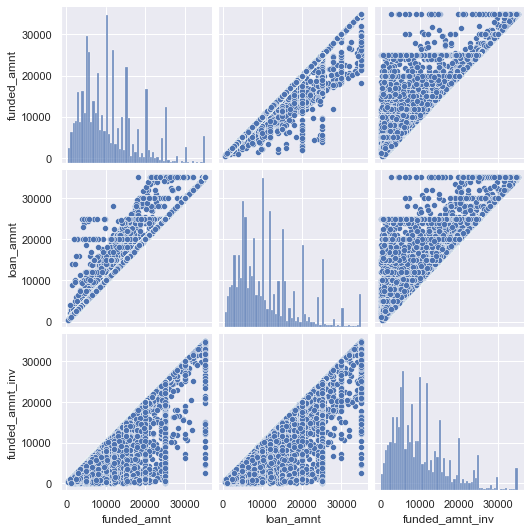

In [58]:
#Distribution of amounts for all three looks very much similar and are highly correlated. so, we will take the amount which is given to cutomer by the bank
sns.pairplot(df[['funded_amnt', 'loan_amnt', 'funded_amnt_inv']])

In [59]:
df.drop(['id', 'member_id', 'loan_amnt', 'emp_title', 'title', 'zip_code', 'open_acc', 'pub_rec', 'inq_last_6mths', 'earliest_cr_line', 'total_acc', 'revol_util', 'funded_amnt', 'pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt', 'url', 'chargeoff_within_12_mths', 'desc', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record','out_prncp_inv', 'total_pymnt_inv', 'collection_recovery_fee', 'last_credit_pull_d'], axis = 1, inplace = True)

In [60]:
df.shape

(39717, 15)

In [61]:
df.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt_inv      39717 non-null  float64
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
dtypes: float64(4), object(11)
memory usa

### I. Checking each variables (Univariant Analysis)
#### a. funded_amnt_inv - Amount for which loan is provided (this seems ok and there are no missing values)


In [63]:
df.funded_amnt_inv.isnull().sum() # No null values

0

<AxesSubplot:ylabel='funded_amnt_inv'>

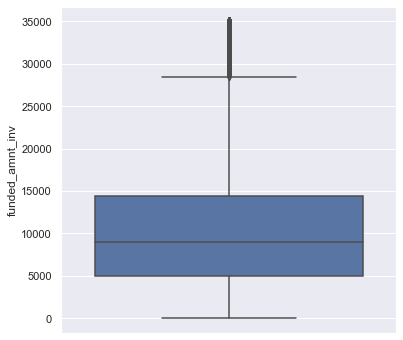

In [64]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = df, y='funded_amnt_inv')

**Observation:** funded_amnt_inv - Most of the loan amount lies in range 5000 - 15000

#### b. term - Term for which loan is provided (It has 2 values 36 months and 60 months)

In [65]:
df.term.isnull().sum() # No null values

0

<AxesSubplot:xlabel='term', ylabel='count'>

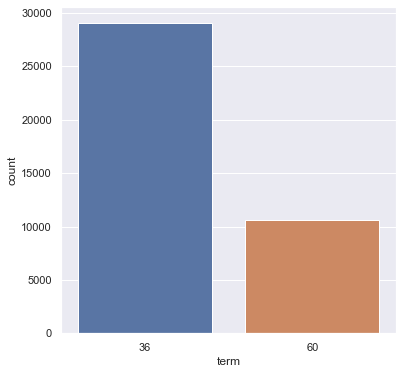

In [66]:
df.term = df.term.apply(lambda x : x.split(' months')[0])
df.term = df.term.astype('int64')
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='term')

**Observation:** Most loan fall under 36 months tenure

#### c. int_rate - Rate of interest

In [67]:
df.int_rate.isnull().sum() # No null values

0

In [68]:
df.int_rate = df.int_rate.astype(str)
df.int_rate = df.int_rate.apply(lambda x : x.split('%')[0])
df.int_rate = df.int_rate.astype('float64')

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

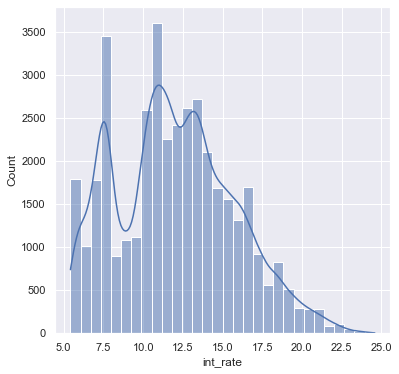

In [69]:
sns.histplot(data = df, x='int_rate', bins=30, kde=True)

**Observation:** Most of the loan interest rates lies in range 10 - 15 %

#### d. installment - Amount of money paid per month

In [70]:
df.installment.isnull().sum() # no null values

0

<AxesSubplot:ylabel='installment'>

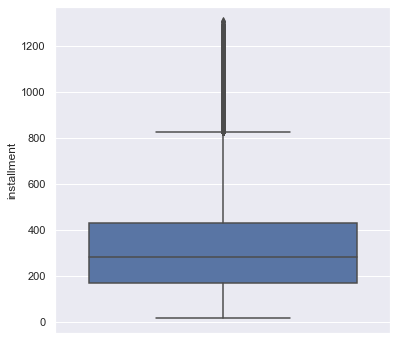

In [71]:
sns.boxplot(data = df, y='installment')

**Observation:** Most of the loan installment lies in range 200 - 400

#### e. grade - LC assigned loan grade

In [72]:
df.grade.isnull().sum() # no null values

0

<AxesSubplot:xlabel='grade', ylabel='count'>

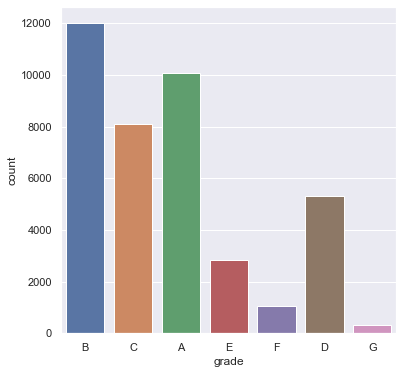

In [73]:
sns.countplot(data = df, x='grade')

**Observation:** Most of the loan have graded with 'B'

#### f. sub_grade - LC assigned loan sub_grade

In [74]:
df.sub_grade.isnull().sum() # no null values

0

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

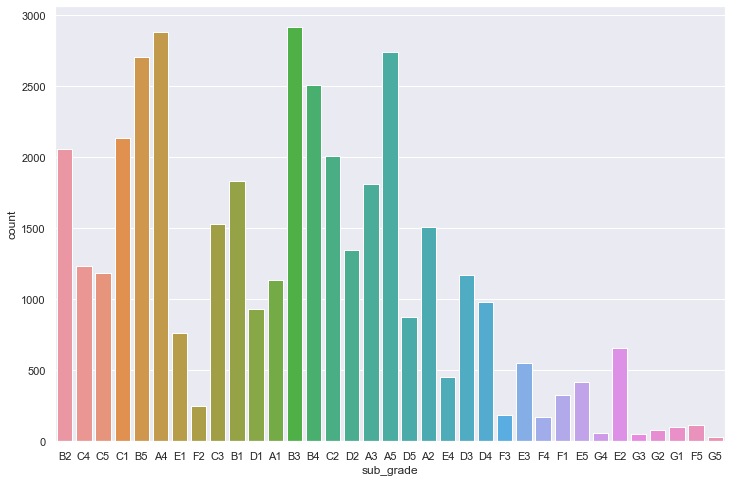

In [75]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(data = df, x='sub_grade')


**Observation:** Most of the loan have subgrade 'B3'

#### g. emp_length - years employed had worked

In [76]:
df.emp_length.isnull().sum() # there are null values

1075

In [77]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

**Note:** The null values can be assigned by mode of the sub-set.

In [78]:
# changing to approx nearest value years and convertint to numeric
df.emp_length = df.emp_length.astype(str)
df.emp_length = df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
df.emp_length = df.emp_length.astype('float64')

**Observation:** Most of the customers has emp_length 10+ years

#### g. loan_status - status of the loan 
- removing the current status dataset as they are not required for analysis
- converting to numeric data where 0 = charged off and 1 = fullypaid

In [79]:
df = df[df.loan_status != "Current"] #removing the current status dataset as they are not required for analysis
df = df[df.loan_status != "Current"]
df.loan_status = df.loan_status.apply(lambda x: 0 if x == "Charged Off" else 1)
df.loan_status.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

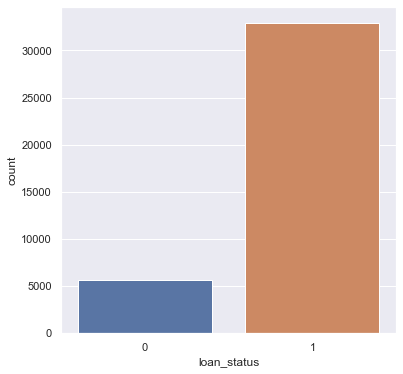

In [80]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='loan_status')

**Observation:** Most of the loans are fully paid

#### h. Other feilds
 - home_ownership - it shows weather the customer is rented or own house
 - annual_inc - Annual income of the customer
 - verification_status - the loan is verified or not
 - issue_d - date at which loan is issued
 - purpose - the purpose of tahing loan
 - addr_state - area customer belongs to
 - dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [81]:
print(df.home_ownership.isnull().sum())
print(df.annual_inc.isnull().sum())
print(df.verification_status.isnull().sum())
print(df.issue_d.isnull().sum())
print(df.purpose.isnull().sum())
print(df.addr_state.isnull().sum())
print(df.dti.isnull().sum())

0
0
0
0
0
0
0


In [82]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

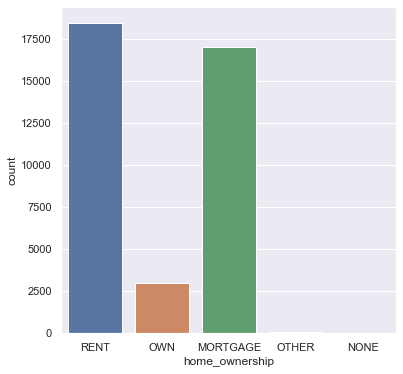

In [83]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='home_ownership')

**Observation:** Most of the customers are rented

<AxesSubplot:ylabel='annual_inc'>

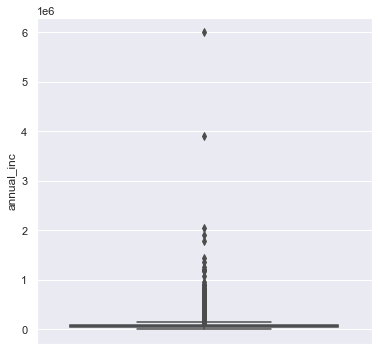

In [84]:
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = df, y='annual_inc')

**Note:** WE can clearly see the outlier in the columns. we can 1.) remove the outlier or 2.) assign 90% percentile value to all who are above 90 %

In [85]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

**Observation:** Most of the customers have income in range 40000-82000

<AxesSubplot:xlabel='verification_status', ylabel='count'>

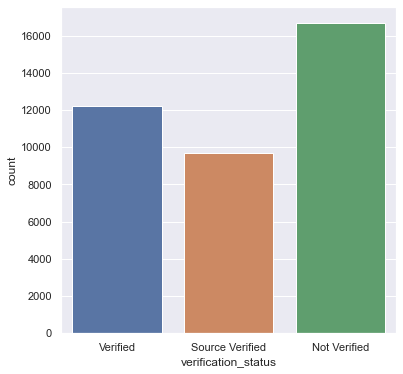

In [86]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='verification_status')

**Note:** Here two value have same meaning. we can change them.
**Observation:** Most of the customer's loan is verified.

<function matplotlib.pyplot.show(close=None, block=None)>

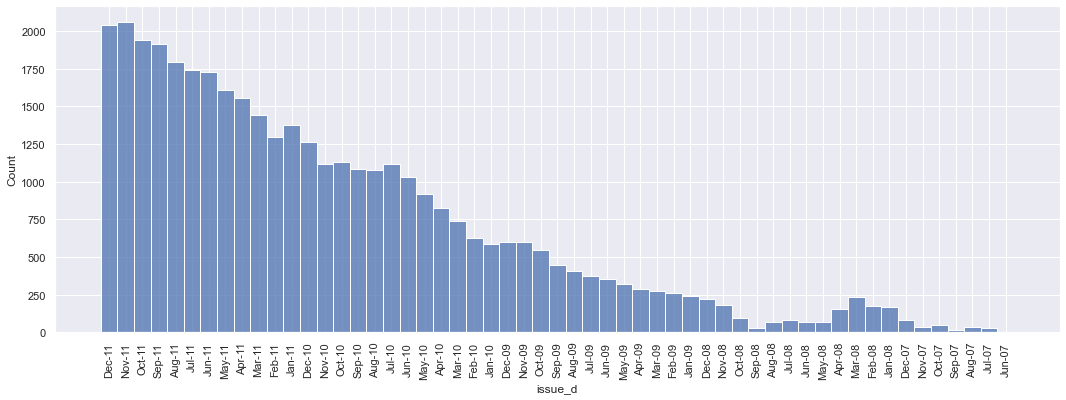

In [87]:
sns.set(rc={'figure.figsize':(18,6)})
plot = sns.histplot(data = df, x='issue_d', bins=80)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show

**Observation:** Most of the loan is given in 2011.

<AxesSubplot:xlabel='Count', ylabel='purpose'>

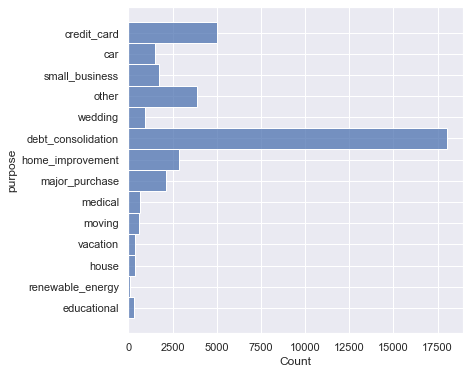

In [88]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(data = df, y='purpose', bins=30)

**Observation:** Most of the loan has taken for debt_consolidation

0


<function matplotlib.pyplot.show(close=None, block=None)>

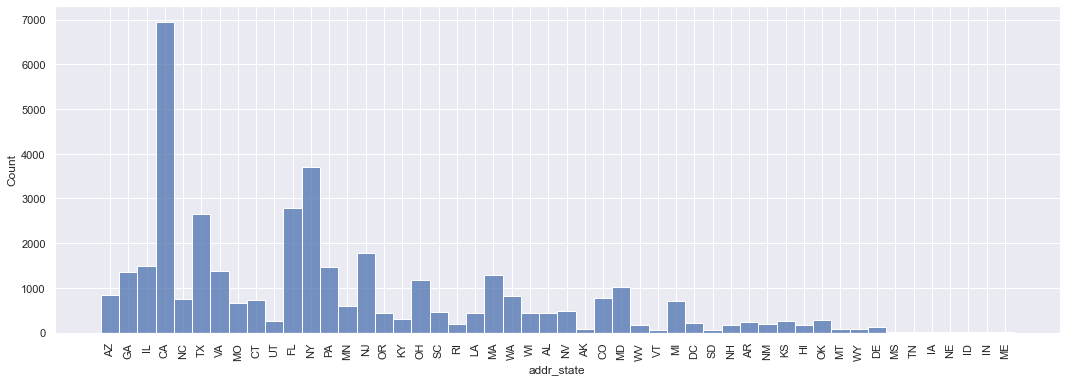

In [89]:
print(df.addr_state.isnull().sum())
sns.set(rc={'figure.figsize':(18,6)})
plot = sns.histplot(data = df, x='addr_state', bins=80)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show


**Observation:** Most of the customers who has taken loan belongs to CA

0


<AxesSubplot:xlabel='dti', ylabel='Count'>

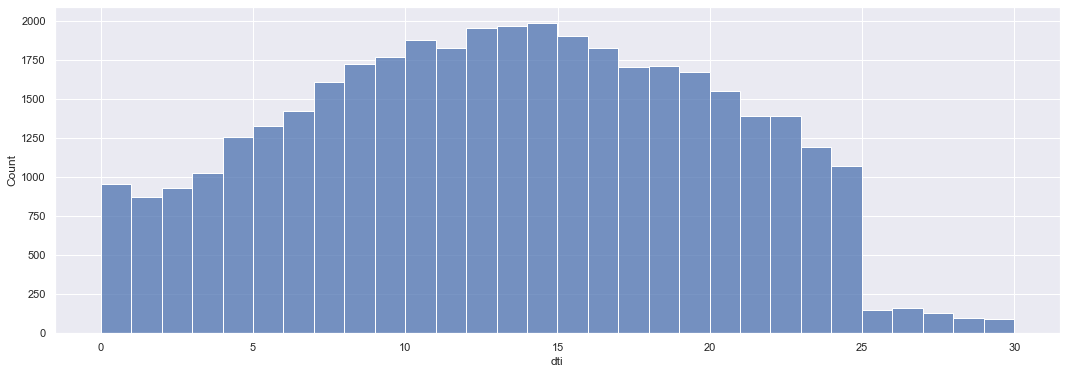

In [90]:
print(df.dti.isnull().sum())
sns.histplot(data = df, x='dti', bins=30)

**Observation:** Most common dti valus in 15


## 3. Now we have the target variable "loan_status". let's see other variable impact on this (Segmented Univariant analysis)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

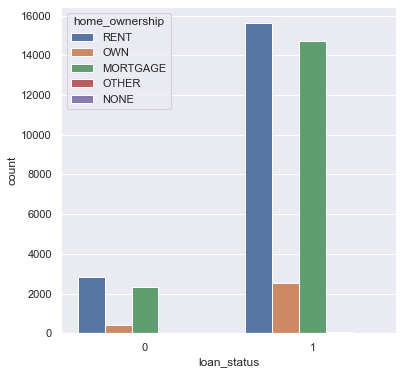

In [91]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='loan_status', hue='home_ownership')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

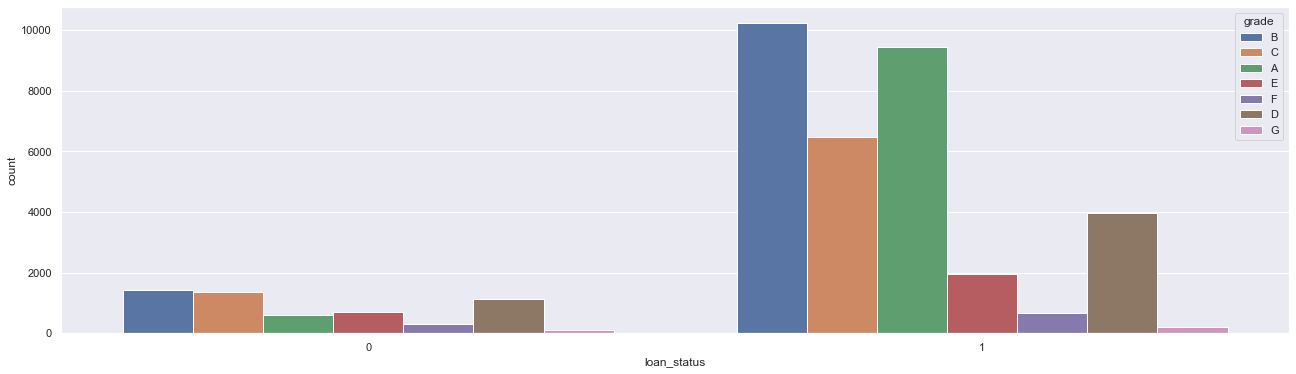

In [92]:
sns.set(rc={'figure.figsize':(22,6)})
sns.countplot(data = df, x='loan_status', hue='grade')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

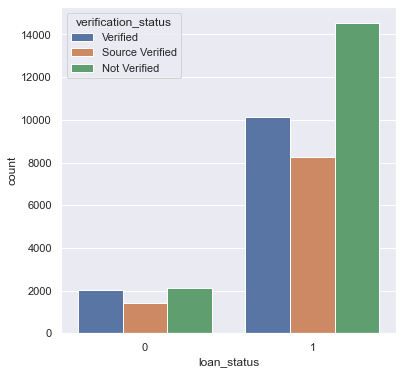

In [93]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data = df, x='loan_status', hue='verification_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

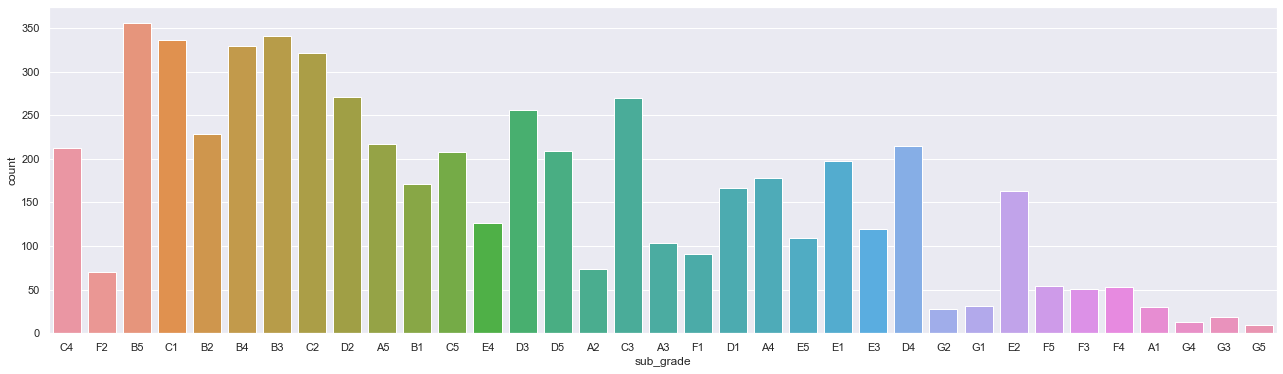

In [94]:
sns.set(rc={'figure.figsize':(22,6)})
sns.countplot(data = df[df['loan_status']==0], x='sub_grade')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

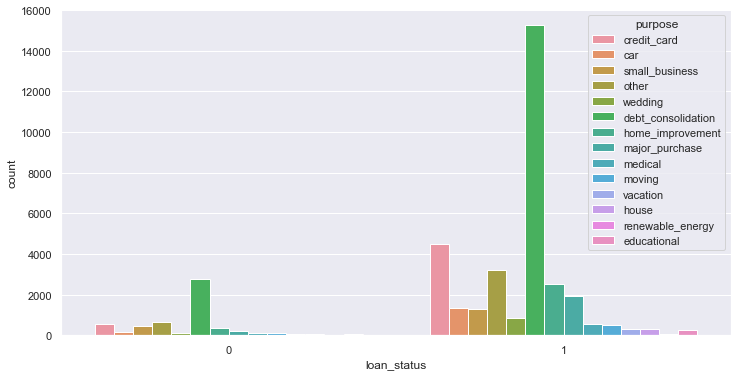

In [95]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data = df, x='loan_status', hue='purpose')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

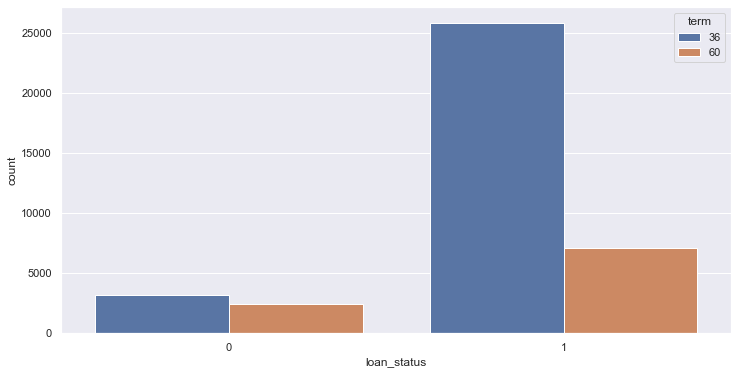

In [96]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data = df, x='loan_status', hue='term')

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

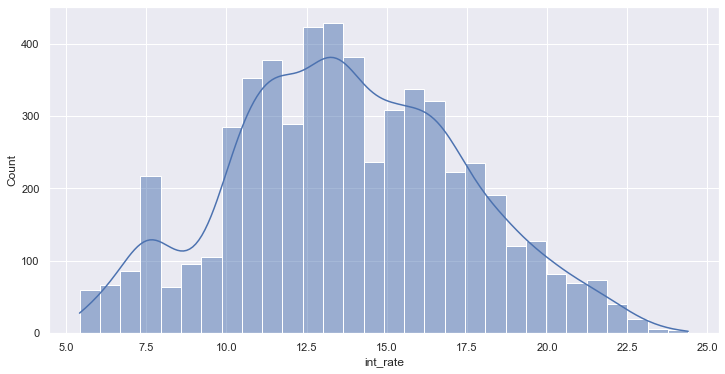

In [97]:
sns.set(rc={'figure.figsize':(12,6)})
sns.histplot(data = df[df['loan_status']==0], x='int_rate', bins=30, kde=True)

<AxesSubplot:xlabel='addr_state', ylabel='count'>

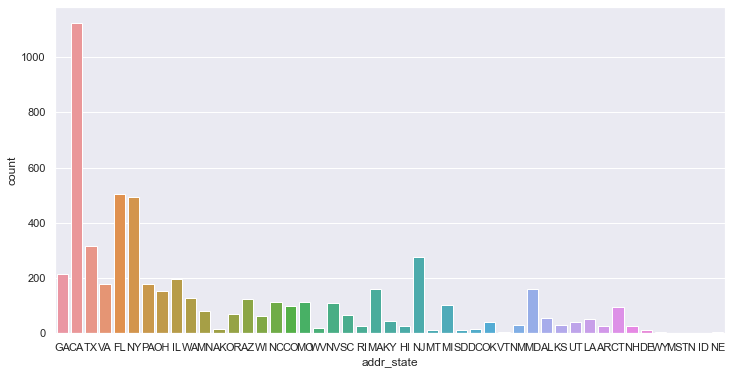

In [98]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data = df[df['loan_status']==0], x='addr_state')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

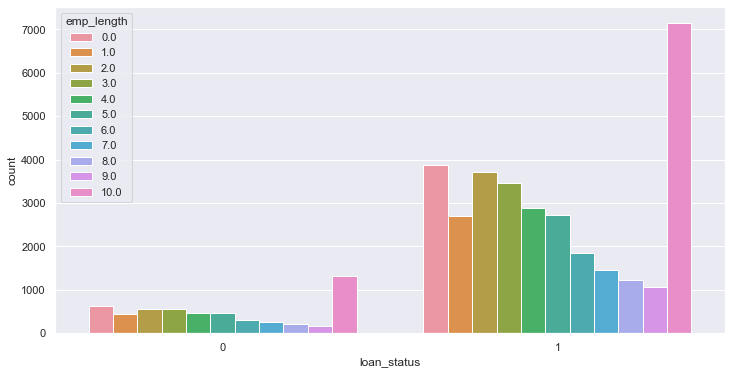

In [99]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data = df, x='loan_status', hue='emp_length')

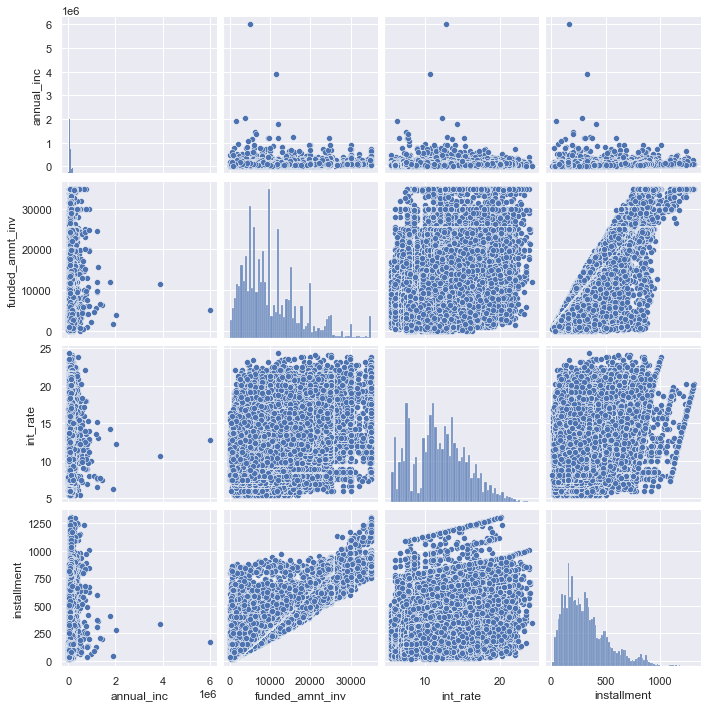

In [101]:
sns.pairplot(data=df[['annual_inc','funded_amnt_inv','int_rate','installment']])

**Observation**  
1. Most of the loan that has been charged off has purpose debt_consolidation
2. Most of the loan with int_rate being high has been charged off
3. Most the charged off customer are from CA.

**Recommendation**
1. Bank can strong the verification for loans taken for debt_consolidation
2. Bank can think on the interest rate, not to make it too high customer fails to pay.
3. Bank can strong the verification for CA. Some extra documents can be asked.